# Salary Prediction using Linear Regression

In [1]:
#imported some necessary Library
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("Salary Data.csv", sep=',')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


# EDA

In [3]:
print("First few rows:")
print(df.head())

First few rows:
   Experience Years  Salary
0               1.1   39343
1               1.2   42774
2               1.3   46205
3               1.5   37731
4               2.0   43525


In [5]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
Experience Years    0
Salary              0
dtype: int64


In [20]:
# Basic Statistics
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes
None

Summary Statistics:
       Experience Years         Salary
count         40.000000      40.000000
mean           5.152500   74743.625000
std            2.663715   25947.122885
min            1.100000   37731.000000
25%            3.200000   56878.250000
50%            4.600000   64472.500000
75%            6.875000   95023.250000
max           10.500000  122391.000000


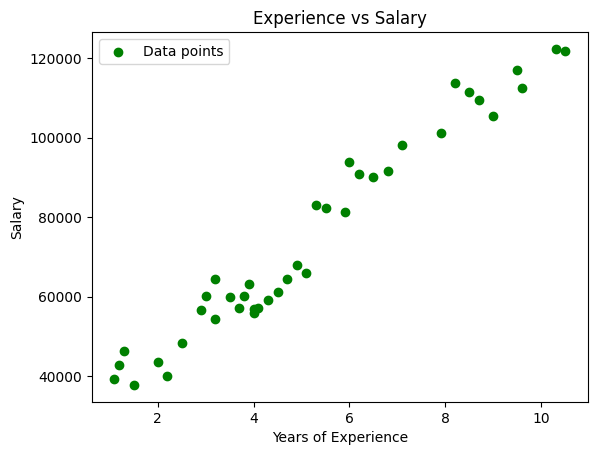

In [11]:
# Visualizing the Data
plt.scatter(df['Experience Years'], df['Salary'], color='green', label='Data points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.legend()
plt.show()

In [24]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


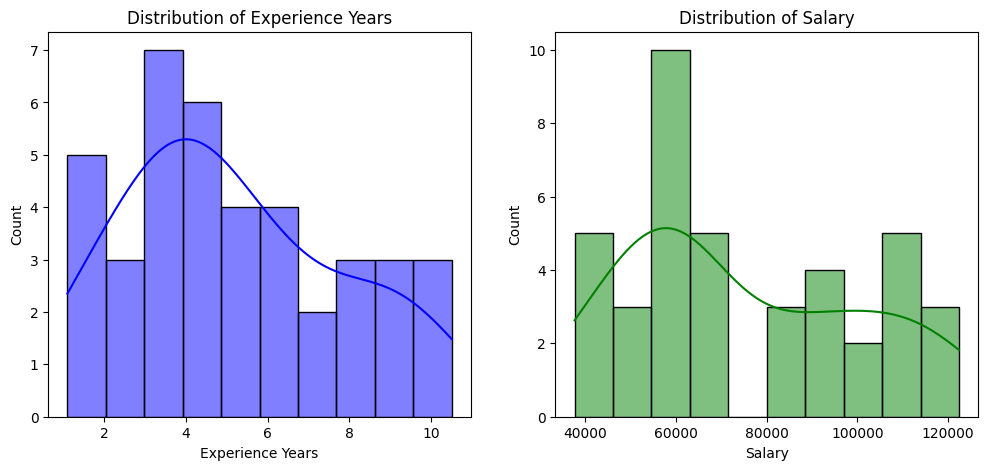

In [26]:
# Distribution of Features
import seaborn as sns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Experience Years'], bins=10, kde=True, color='blue')
plt.title('Distribution of Experience Years')

plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], bins=10, kde=True, color='green')
plt.title('Distribution of Salary')
plt.show()

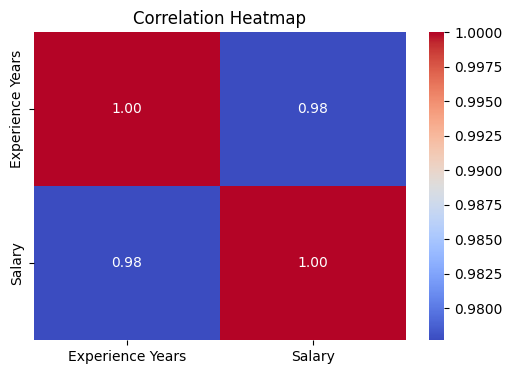

In [27]:
# Correlation Analysis
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

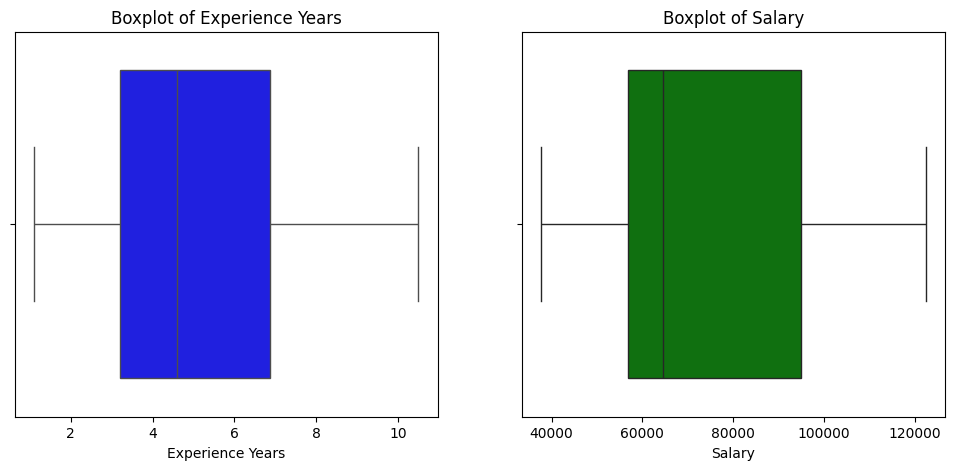

In [28]:
# Outlier Detection using Boxplot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Experience Years'], color='blue')
plt.title('Boxplot of Experience Years')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Salary'], color='green')
plt.title('Boxplot of Salary')
plt.show()

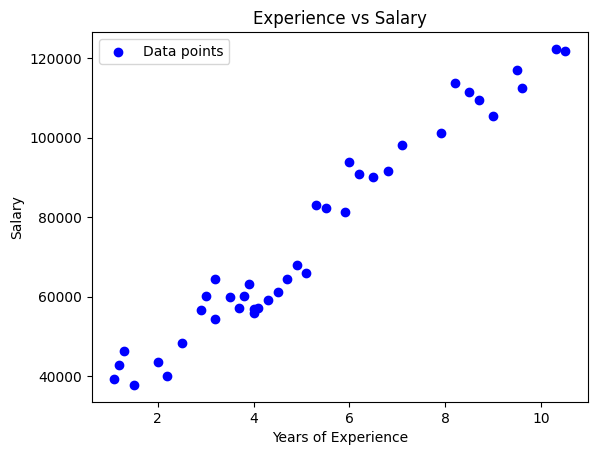

In [29]:
# Visualizing the Data
plt.scatter(df['Experience Years'], df['Salary'], color='blue', label='Data points')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.legend()
plt.show()

# Linear Regression

In [12]:
# Split the Data into Training and Testing Sets
X = df[['Experience Years']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#  Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 48077731.16919359
R-squared Score: 0.9068577573647874


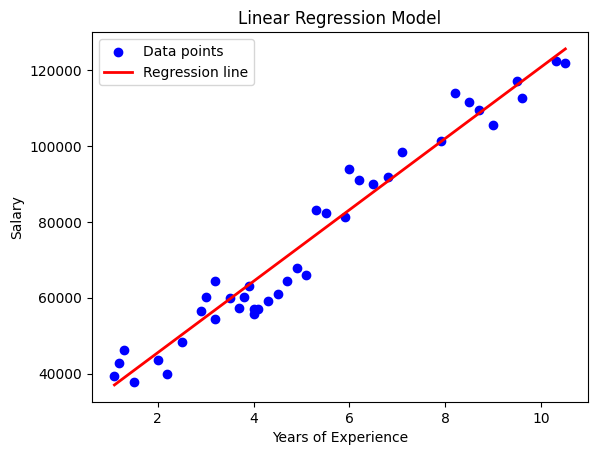

In [17]:
# Visualizing the Regression Line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

In [18]:
# Predict Salary for a Given Experience
def predict_salary(experience):
    return model.predict([[experience]])[0]

In [19]:
# Example prediction
experience_years = 5
predicted_salary = predict_salary(experience_years)
print(f'Predicted Salary for {experience_years} years of experience: {predicted_salary}')

Predicted Salary for 5 years of experience: 73756.40653867844


C:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Cost & Lose

In [30]:
def compute_cost(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

cost = compute_cost(y_test, y_pred)
print(f'\nCost (Loss): {cost}')


Cost (Loss): 48077731.16919359
